In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [4]:
df=pd.read_csv('Final_Data.csv')

In [5]:
df.head()

,Entity,Code,Year,Density,Ferility_Rate,Males_per_100_Females,Growth_Rate,Education_Post_Secondary,Education_Upper_Secondary,Education_Lower_Secondary,Education_Primary,Education_Incomplete_Primary,Education_No_Education,Population_Under_15
0,Afghanistan,AFG,1950,11.976,7.248,112.618350,1.275,800.0,5300.0,0.0,155000.0,0.0,4411200.0,3179900.0
1,Afghanistan,AFG,1951,12.135,7.260,112.082726,1.360,960.0,6240.0,0.0,163460.0,0.0,4455640.0,3229540.0
2,Afghanistan,AFG,1952,12.302,7.260,111.549540,1.374,1120.0,7180.0,0.0,171920.0,0.0,4500080.0,3279180.0
3,Afghanistan,AFG,1953,12.470,7.266,111.028630,1.335,1280.0,8120.0,0.0,180380.0,0.0,4544520.0,3328820.0
4,Afghanistan,AFG,1954,12.641,7.254,110.527310,1.394,1440.0,9060.0,0.0,188840.0,0.0,4588960.0,3378460.0


In [6]:
df.sample()

,Entity,Code,Year,Density,Ferility_Rate,Males_per_100_Females,Growth_Rate,Education_Post_Secondary,Education_Upper_Secondary,Education_Lower_Secondary,Education_Primary,Education_Incomplete_Primary,Education_No_Education,Population_Under_15
8588,Namibia,NAM,2012,2.666,3.676,93.66732,2.605,99980.0,255860.0,259240.0,353720.0,270780.0,186220.0,860360.0


## Feature Engineering

In [7]:
df.sample()

,Entity,Code,Year,Density,Ferility_Rate,Males_per_100_Females,Growth_Rate,Education_Post_Secondary,Education_Upper_Secondary,Education_Lower_Secondary,Education_Primary,Education_Incomplete_Primary,Education_No_Education,Population_Under_15
8092,Moldova,MDA,1960,93.552,3.315,84.308685,2.212,15100.0,98300.0,218800.0,436400.0,146600.0,1133600.0,954700.0


In [8]:
df.columns

Index(['Entity', 'Code', 'Year', 'Density', 'Ferility_Rate',
       'Males_per_100_Females', 'Growth_Rate', 'Education_Post_Secondary',
       'Education_Upper_Secondary', 'Education_Lower_Secondary',
       'Education_Primary', 'Education_Incomplete_Primary',
       'Education_No_Education', 'Population_Under_15'],
      dtype='object')

In [9]:
'''
Meta Data
• Under 15: Population below 15 years old
• No Education: Highest level of education attained: No level and Grade 1 of ISCED 1 not completed.
• Incomplete Primary: Highest level of education attained: Incomplete ISCED 1
• Primary: Highest level of education attained: Completed ISCED 1 and incomplete ISCED 2
• Lower Secondary: Highest level of education attained: Completed ISCED 2 and incomplete ISCED 3
• Upper Secondary: Highest level of education attained: Completed ISCED 3 and incomplete ISCED 4 5 or 6
• Post Secondary: Highest level of education attained: Completed ISCED 4 5 6 7 or 8
• Short Post Secondary: Highest level of education attained: Completed ISCED 4 or 5
'''

'\nMeta Data\n• Under 15: Population below 15 years old\n• No Education: Highest level of education attained: No level and Grade 1 of ISCED 1 not completed.\n• Incomplete Primary: Highest level of education attained: Incomplete ISCED 1\n• Primary: Highest level of education attained: Completed ISCED 1 and incomplete ISCED 2\n• Lower Secondary: Highest level of education attained: Completed ISCED 2 and incomplete ISCED 3\n• Upper Secondary: Highest level of education attained: Completed ISCED 3 and incomplete ISCED 4 5 or 6\n• Post Secondary: Highest level of education attained: Completed ISCED 4 5 6 7 or 8\n• Short Post Secondary: Highest level of education attained: Completed ISCED 4 or 5\n'

##### According to the ISCED standards, Post Secondary education is the highest level of education attained. Hence, we will use this as our target variable.

##### We need an overall population metric that captures the total population of a country. We will call it total population

In [10]:
df['Total_Population'] = df['Education_Post_Secondary'] + df['Education_Upper_Secondary'] +\
      df['Education_Lower_Secondary'] + df['Education_Primary'] + df['Education_Incomplete_Primary'] +\
          df['Education_No_Education'] + df['Population_Under_15']


In [11]:
df.sample()

,Entity,Code,Year,Density,Ferility_Rate,Males_per_100_Females,Growth_Rate,Education_Post_Secondary,Education_Upper_Secondary,Education_Lower_Secondary,Education_Primary,Education_Incomplete_Primary,Education_No_Education,Population_Under_15,Total_Population
7948,Mexico,MEX,1964,21.32,6.833,100.042305,3.291,261360.0,613920.0,1803380.0,4371400.0,7504280.0,8530600.1,20248340.0,43333280.1


<Axes: >

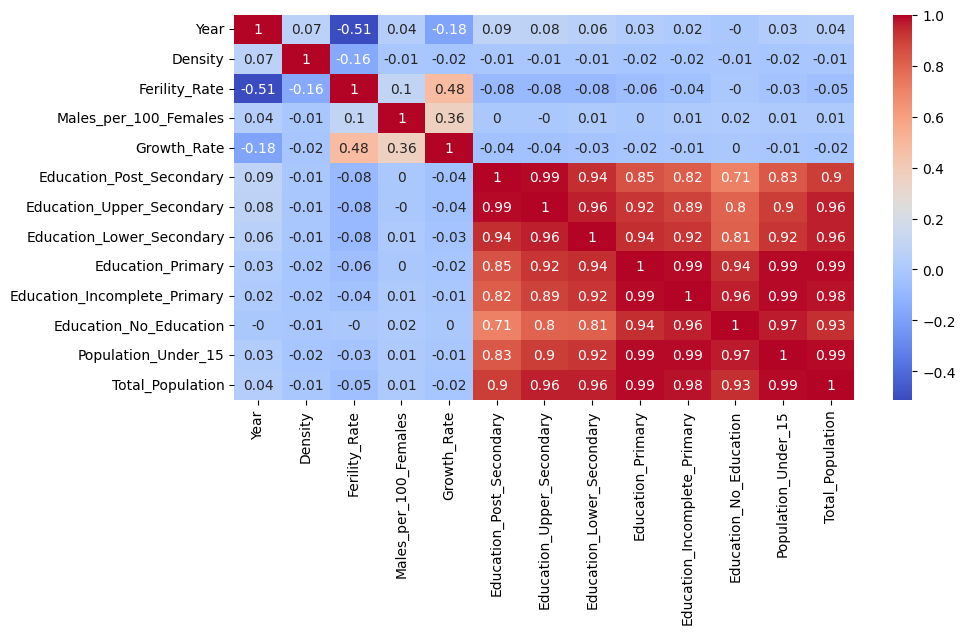

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
corr=df.corr(numeric_only=True).round(2)
sns.heatmap(corr,annot=True, cmap='coolwarm')

In [13]:
df.head()

,Entity,Code,Year,Density,Ferility_Rate,Males_per_100_Females,Growth_Rate,Education_Post_Secondary,Education_Upper_Secondary,Education_Lower_Secondary,Education_Primary,Education_Incomplete_Primary,Education_No_Education,Population_Under_15,Total_Population
0,Afghanistan,AFG,1950,11.976,7.248,112.618350,1.275,800.0,5300.0,0.0,155000.0,0.0,4411200.0,3179900.0,7752200.0
1,Afghanistan,AFG,1951,12.135,7.260,112.082726,1.360,960.0,6240.0,0.0,163460.0,0.0,4455640.0,3229540.0,7855840.0
2,Afghanistan,AFG,1952,12.302,7.260,111.549540,1.374,1120.0,7180.0,0.0,171920.0,0.0,4500080.0,3279180.0,7959480.0
3,Afghanistan,AFG,1953,12.470,7.266,111.028630,1.335,1280.0,8120.0,0.0,180380.0,0.0,4544520.0,3328820.0,8063120.0
4,Afghanistan,AFG,1954,12.641,7.254,110.527310,1.394,1440.0,9060.0,0.0,188840.0,0.0,4588960.0,3378460.0,8166760.0


As can be seen above, we have only two categorical variables, which are "Entity" and "Code". They are both nominal in nature. If we want to use these variables for any machine learning model, we need to convert them into numerical variables. We will use one-hot encoding to convert these variables into numerical variables.

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
enc = OneHotEncoder(handle_unknown='ignore')
Our_Array=enc.fit_transform(df[['Entity', 'Code']]).toarray() # we need to change the sparse matrix to an array, that is why toarray() is used

In [16]:
columns=enc.categories_ #getting only the column names
Column_Arrays= np.concatenate(np.array(columns,dtype=object)) # we need to concatenate the arrays in columns to get the column names
Dummy_Data=pd.DataFrame(Our_Array,columns=Column_Arrays) #Changing arrays to dataframe

## Now we will merge the dummy data with the original data 
It is important to mention dropping either Entity or Code column from the original data would have had no affect of ML performance  but we decided to keet them for good practice in our end productionaized model.


In [17]:
df=pd.concat([df,Dummy_Data],axis=1)

In [18]:
df.shape

(13825, 415)

In [19]:
df.drop(['Entity','Code'],axis=1,inplace=True)

## Preparing our train and test data

In [20]:
X1=df.drop(['Education_Post_Secondary'],axis=1)
y1=df['Education_Post_Secondary'].values

In [21]:
y1

array([8.00000e+02, 9.60000e+02, 1.12000e+03, ..., 1.03692e+06,
       1.09364e+06, 1.15036e+06])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42, shuffle=True)

### Testing models 
##### 1.Linear Regression, lasso, ridge regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [24]:
reg = LinearRegression()
reg.fit(X_train,y_train)
np.mean(cross_val_score(reg, X_train.values, y_train,scoring= 'neg_mean_absolute_error', cv=3)).round(7)
# the value is exteremly low which is good, but this is based merely on the training data. And the model is probably overfitting.


np.float64(-1e-07)

### Let's check for for Multicoliniearity

In [25]:
Test_df=df[['Education_Post_Secondary','Education_Upper_Secondary','Education_Lower_Secondary','Education_Primary','Education_Incomplete_Primary','Education_No_Education','Population_Under_15','Total_Population','Year','Density','Ferility_Rate','Males_per_100_Females','Growth_Rate']]

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = Test_df.columns
vif_data["VIF"] = [variance_inflation_factor(Test_df.values, i) for i in range(len(Test_df.columns))]

c:\Users\yadal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [27]:
vif_data
# the variance inflation factor is high for all the columns except Density and Growth_rate, so there is multicolinearity
# Linear regression might be too unstable. 

,feature,VIF
0,Education_Post_Secondary,inf
1,Education_Upper_Secondary,inf
2,Education_Lower_Secondary,inf
3,Education_Primary,inf
4,Education_Incomplete_Primary,inf
5,Education_No_Education,inf
6,Population_Under_15,inf
7,Total_Population,inf
8,Year,55.915511
9,Density,1.080221


Since the data is highly multicolinear, we will go for lasso and ridge regression since they weaken some variables.

In [28]:
### 1. Lasso regression

In [29]:
from sklearn import linear_model
clf = linear_model.Lasso()
np.mean(cross_val_score(clf, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3)).round(5)


#This results seem more accurate since it is not exteremly accurate like the linear regression, 
#basically, the result means the model is wrong with a range of 728917 people, but yet again, this prediction is only on
#train data, so it is not reliable


c:\Users\yadal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.482e+16, tolerance: 9.059e+14
  model = cd_fast.enet_coordinate_descent(
c:\Users\yadal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.276e+16, tolerance: 7.523e+14
  model = cd_fast.enet_coordinate_descent(
c:\Users\yadal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

np.float64(-728917.80133)

Hyper-tunning our Lasso Regression model for picking best alpha value 

### 2. Ridge regression

In [30]:
from sklearn.linear_model import Ridge
RDG = Ridge()
np.mean(cross_val_score(RDG, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3)).round(6)

#This results does not seem  accurate since it is exteremly accurate. Perhaps multicollinearity is a problem here again.



c:\Users\yadal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.23002e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\yadal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.4111e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\yadal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.54184e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


np.float64(-4e-06)

### Hyper tunning our Ridge Regression model for picking best alpha value

c:\Users\yadal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.21971e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\yadal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.41564e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\yadal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.53123e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\yadal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.66825e-23): result may not be accurate.
  return linalg.solve

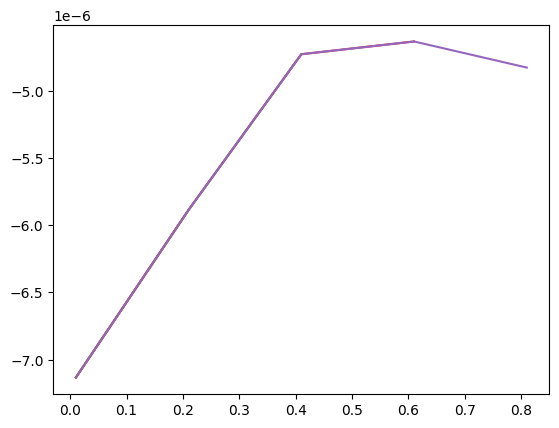

In [31]:
R_error=[]
R_alpha=[]
for i in range (1,100,20):
    R_alpha.append(i/100)
    RDG1 = RDG = Ridge(alpha=i/100, max_iter=100000)
    R_error.append(np.mean(cross_val_score(RDG1, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3)))
    plt.plot(R_alpha,R_error);

In [32]:
columns={"Errors": R_error, "Alpha": R_alpha}
Results =pd.DataFrame(columns)
Results[Results['Errors'] == Results['Errors'].max()]

#Alpha at 0.61 is the best value.

,Errors,Alpha
3,-0.000005,0.61


### 3. Random forest

In [33]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(random_state=0)
np.mean(cross_val_score(RF, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3)).round(5)


np.float64(-164117.86037)

In [34]:
# Random forest performs much better than lasso regression. The value is 164117 compared to 728917 of Lasso

### 4.XGBoost

In [35]:
import xgboost as xgb
xgb_r = xgb.XGBRegressor(objective ='reg:linear', max_depth=4,alpha=10,learning_rate=0.05, n_estimators = 200, seed = 123) # Fit the model, test sets are used for early stopping.
xgb_r.fit(X_train, y_train)


c:\Users\yadal\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:57:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, ...)

In [36]:
np.mean(cross_val_score(xgb_r, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3)).round(5)


c:\Users\yadal\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:57:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\yadal\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:57:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\yadal\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:57:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\objectiv

np.float64(-450551.2708)

In [37]:
# XGBoost performs worse than random forest. The value is 450551 compared to 164117 of RF

### 5. Adaboost 

In [38]:
from sklearn.ensemble import AdaBoostRegressor
Adaboost_Tree = AdaBoostRegressor(random_state=0, n_estimators=90, learning_rate=0.05)
Adaboost_Tree.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.05, n_estimators=90, random_state=0)

In [39]:
np.mean(cross_val_score(Adaboost_Tree, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3)).round(5)

np.float64(-2139882.52581)

In [40]:
# adaboost performs much worse than random forest. The value is 2139882 compared to 164117 of RF

### Predictions

In [41]:
LR_prediction= reg.predict(X_test)

In [42]:
LassoR_prediction= linear_model.Lasso().fit(X_train,y_train).predict(X_test)
RidgeR_prediction= Ridge(alpha=0.61).fit(X_train,y_train).predict(X_test)
adaboostpredict= Adaboost_Tree.predict(X_test)
Random_forest= RandomForestRegressor().fit(X_train,y_train).predict(X_test)
xgbpredict= xgb_r.predict(X_test)

c:\Users\yadal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.072e+16, tolerance: 1.166e+15
  model = cd_fast.enet_coordinate_descent(
c:\Users\yadal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.66028e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [51]:
from sklearn.metrics import mean_absolute_error
print(f'Linear Regression: {mean_absolute_error(y_test, LR_prediction)}')
print(f'Lasso regression: {mean_absolute_error(y_test, LassoR_prediction).round(1)} People')
print(f'Ridge regression: {mean_absolute_error(y_test, RidgeR_prediction)}')
print(f'Adaboost: {mean_absolute_error(y_test, adaboostpredict).round(1)} People')
print(f'Random forest: {mean_absolute_error(y_test, Random_forest).round(1)} People')
print(f'XGBoost: {mean_absolute_error(y_test, xgbpredict).round(1)} People')

Linear Regression: 1.0034612755279002e-07
Lasso regression: 753510.5 People
Ridge regression: 1.0389649498673328e-05
Adaboost: 2198208.5 People
Random forest: 104671.4 People
XGBoost: 437800.7 People


As can be seen, random forest is outperforming the other models. The mean absolute error is 115699.  
This has no overfitting problems.  
This means our model can predict the population of a year within 115699.7 margin of error, which is a bery number

Ridge Regression and Linear regression are heavily influnced by multicollinearity, so their predictions are not accurate.